## Observations and Insights 

ANALYSIS 
1) The first thing to look at is which drugs were successful. By looking at the created bar graphs, we can see that Cap and R were able to produce the most timepoints, meaning that the mice on these drugs were able to stay alive longer to have more tests run. However, going off this, one further comparison that should be done is comparing the number of mice in each treatment, just to understand if one drug would have gotten a boost from more mice using the treatment instead of the drug having better performance. A separate observation that we see in the scatter plot is that there is a strong positive correlation between weight of the mouse and tumor volume. Carrying this idea over to humans, it would suggest that the heavier the person is, they are likelier to have a larger tumor if they were to sustain one. 

2) One of the things that could be looked into further is going into how the different genders compared. We see that mice that way more are more likely to have larger tumors, and depending on the tendencies of mice, we might see that one gender is more likely to have larger tumor size. We  also see if different genders respond better or worse depending on the drug. 

3) We also see that the Placebo drug was on par with other treatments. From a neurological side, this is interesting that there could be a Placebo effect on mice. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem 
import numpy as np 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(study_data_complete["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_data_complete = study_data_complete[study_data_complete['Mouse ID'].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

data = clean_study_data_complete.groupby('Drug Regimen')['Tumor Volume (mm3)']
mice_mean = data.mean()
mice_median = data.median()
mice_var = data.var()
mice_stdv = data.std()
mice_sem = data.sem()


# This method is the most straighforward, creating multiple series and putting them all together at the end.

stats_df = pd.DataFrame({"Mean":mice_mean,
                        "Median":mice_median,
                        "Variance":mice_var,
                        "Standard Deviation":mice_stdv,
                        "SEM":mice_sem,
                        })
stats_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen


data.agg(['mean', 'median','var','std','sem'])
# This method produces everything in a single groupby function



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

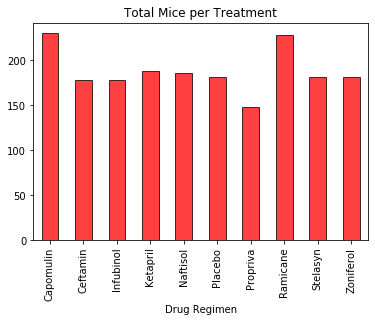

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of mice for each treatment 
# throughout the course of the study using pandas. 

grouped_df = clean_study_data_complete.groupby("Drug Regimen")
var = grouped_df['Mouse ID'].count()
graph = var.plot(kind='bar',color='r',title="Total Mice per Treatment",alpha=.75,edgecolor='k')
#plt.ylabel("Number of Mice")
#graph.set_ylabel("Number")

plt.show()
plt.tight_layout()

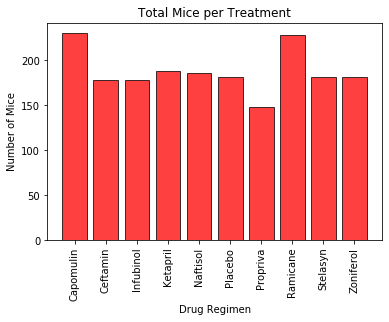

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of mice for each treatment 
# throughout the course of the study using pyplot.


#create bar chart
 
plt.bar(var.index,var,color='r',alpha=.75,edgecolor='k')
plt.xticks(rotation=90)

plt.ylabel('Number of Mice')
plt.title('Total Mice per Treatment')
plt.xlabel('Drug Regimen')

plt.show()
plt.tight_layout()

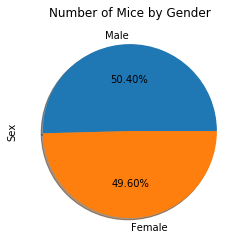

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


gender = mouse_metadata.loc[mouse_metadata['Mouse ID'] != 'g989']
gender_stats = gender['Sex'].value_counts()
gender_stats.plot(kind='pie', shadow = True, autopct = '%1.2f%%')
plt.title("Number of Mice by Gender")

plt.show()

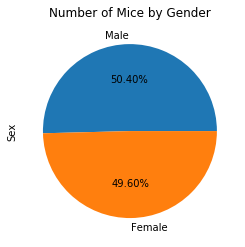

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


labels = gender_stats.index
sizes= gender_stats 
chart_mice = plt.pie(sizes,autopct='%1.2f%%',labels=labels)
plt.title("Number of Mice by Gender")
plt.ylabel("Sex")
chart_mice


plt.show()
plt.tight_layout()


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Start by getting the last (greatest) timepoint for each mouse

timepoint_mouse_df = clean_study_data_complete[['Mouse ID','Timepoint','Drug Regimen']]

filtered_df = timepoint_mouse_df[timepoint_mouse_df['Drug Regimen'].isin(treatment)]
grouped_df = filtered_df.groupby('Mouse ID')['Timepoint'].max()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(grouped_df,clean_study_data_complete,on=['Mouse ID','Timepoint'],how='left')
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [43]:
#Put treatments into a list for a for loop (and later for plot labels)
data = merged_df['Tumor Volume (mm3)']
quartiles = data.quantile([.25,.5,.75])

# Create empty list to fill with tumor vol data (for plotting)
counter = 0
#tumor_vol_list = []
for drug in treatment:
    quartile = data.quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq+(1.5*iqr),2)
# Calculate the IQR and quantitatively determine if there are any potential outliers.


# Locate the rows which contain mice on each drug and get the tumor volume
# add subset

# Determine outliers using upper and lower bounds

    if counter == 0:
        print(f"--------------------------------------------------------")
    print(f"{drug} IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    print(f"Values below {lower_bound} for {drug} could be outliers.")
    print(f"Values above {upper_bound} for {drug} could be outliers.")
    print(f"--------------------------------------------------------")
    
    counter += 1

--------------------------------------------------------
Capomulin IQR data is:
The lower quartile of Capomulin is: 37.187743802499995
The upper quartile of Capomulin is: 59.930261755000004
The interquartile range of Capomulin is: 22.74
The the median of Capomulin is: 45.0 
Values below 3.08 for Capomulin could be outliers.
Values above 94.04 for Capomulin could be outliers.
--------------------------------------------------------
Ramicane IQR data is:
The lower quartile of Ramicane is: 37.187743802499995
The upper quartile of Ramicane is: 59.930261755000004
The interquartile range of Ramicane is: 22.74
The the median of Ramicane is: 45.0 
Values below 3.08 for Ramicane could be outliers.
Values above 94.04 for Ramicane could be outliers.
--------------------------------------------------------
Infubinol IQR data is:
The lower quartile of Infubinol is: 37.187743802499995
The upper quartile of Infubinol is: 59.930261755000004
The interquartile range of Infubinol is: 22.74
The the median

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [18]:
# creating a df based on Capomulin
cap_mice = clean_study_data_complete.loc[clean_study_data_complete['Drug Regimen']=='Capomulin']
print(len(cap_mice['Mouse ID'].unique()))
cap_mice.head()

25


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


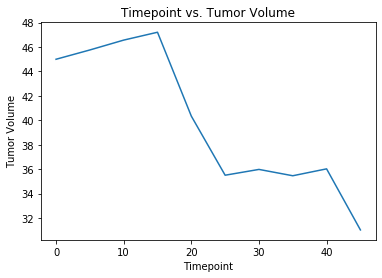

<Figure size 432x288 with 0 Axes>

In [33]:
# Generate a line plot of time point versus tumor volume 
# for a mouse treated with Capomulin
mouse = clean_study_data_complete.loc[clean_study_data_complete['Mouse ID']=='u364']
x_axis = mouse['Timepoint']
y_axis = mouse['Tumor Volume (mm3)']

plt.ylabel('Tumor Volume')
plt.xlabel('Timepoint')
plt.title('Timepoint vs. Tumor Volume')

plt.plot(x_axis,y_axis)
plt.show()
plt.tight_layout()

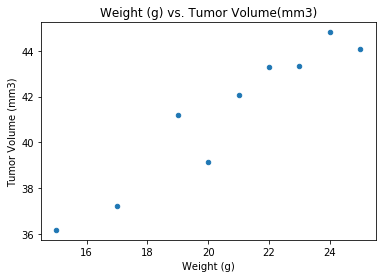

<Figure size 432x288 with 0 Axes>

In [34]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df = cap_mice.groupby('Weight (g)')

mean_tumor = cap_df['Tumor Volume (mm3)'].mean()
weight_tumor = pd.DataFrame(mean_tumor).reset_index()
weight_tumor.plot(kind='scatter',x='Weight (g)',y='Tumor Volume (mm3)',)
plt.title('Weight (g) vs. Tumor Volume(mm3)')

plt.show()
plt.tight_layout()

## Correlation and Regression

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
tumor_var = weight_tumor['Weight (g)']
weight_var = weight_tumor['Tumor Volume (mm3)']
corr = st.pearsonr(tumor_var,weight_var)
print(f"The correlation coefficient between weight and average tumor volume is {corr[0]}")

The correlation coefficient between weight and average tumor volume is 0.9505243961855265


Text(0.5, 0, 'Tumor Volume')

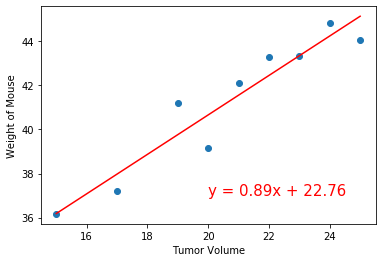

In [37]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(tumor_var,weight_var)
regress_vals = tumor_var*slope+intercept 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(tumor_var,weight_var)
plt.plot(tumor_var, regress_vals,'r-')
plt.annotate(line_eq,(20,37), fontsize= 15,color ='r')

plt.ylabel("Weight of Mouse")
plt.xlabel("Tumor Volume")